# Imports

In [1]:
%reload_ext autoreload
%autoreload 2

In [48]:
import json, pickle

import pandas as pd

from tabulate import tabulate

import tensorflow as tf
from tensorflow.keras.models import load_model
from utils.recommendation import *
from dataset.dataset_padchest import *

In [3]:
@tf.function()
def sampling(args):
    z_mean, z_log_sigma = args
    epsilon = tf.random.normal(shape=(tf.shape(z_mean)[0], config['model']['latent_dim']), mean=0., stddev=0.1)
    return z_mean + tf.math.exp(z_log_sigma) * epsilon

# Data load

In [4]:
with open('./config.json', 'r') as f:
    config = json.load(f)

In [5]:
data = Dataset(config)

with open(config["PATHS"]["IMAGES_PATH"] + "", 'rb') as f:
    data = pickle.load(f)

In [6]:
LABELS = sorted(config["padchest"]["label_names"], key=config["padchest"]["label_names"].get)

# Precision@k

In [51]:
BASE_PATH = ''
model_name = BASE_PATH + 'results_padchest_v33_MOCVAE/models/'

In [52]:
encoder = load_model(model_name + 'e_best_encoder.h5', custom_objects={'sampling': sampling})

/opt/conda/lib/python3.8/site-packages/tensorflow/python/keras/layers/core.py:1043: UserWarning: models.model_MOCVAE is not loaded, but a Lambda layer uses it. It may cause errors.
  warnings.warn('{} is not loaded, but a Lambda layer uses it. '


In [53]:
acc_mean_dict = {}
acc_stddev_dict = {}

for label_base in LABELS:
    if label_base!='normal':
        print("\n-----Label ", label_base, "-----")

        acc_mean_dict[label_base] = []
        acc_stddev_dict[label_base] = []

        for k in [3,4,5,10]:
            if model_name[-14:-8] == 'MOCVAE':
                res_class = get_recom_results_normal(data, encoder, label_base, n_imgs=500, n_neighbors=k, vae=True)
            else:
                res_class = get_recom_results_normal(data, encoder, label_base, n_imgs=500, n_neighbors=k)

            acc_mean, acc_stddev = get_recom_acc(res_class)

            print("Model accuracy with k=", k , " neighbors: ", acc_mean, " +-", acc_stddev)

            acc_mean_dict[label_base].append(acc_mean)
            acc_stddev_dict[label_base].append(acc_stddev)

    df_acc_mean = pd.DataFrame.from_dict(acc_mean_dict, orient='index', columns=[3, 4, 5, 10])
    df_acc_stddev = pd.DataFrame.from_dict(acc_stddev_dict, orient='index', columns=[3, 4, 5, 10])


-----Label  cardiomegaly -----
Model accuracy with k= 3  neighbors:  59.670781893004126  +- 34.43291299713407
Model accuracy with k= 4  neighbors:  59.5679012345679  +- 30.57269752355504
Model accuracy with k= 5  neighbors:  58.27160493827161  +- 28.57911364843819
Model accuracy with k= 10  neighbors:  56.48148148148148  +- 23.47765478808355

-----Label  aortic elongation -----
Model accuracy with k= 3  neighbors:  58.80149812734081  +- 31.21448170189458
Model accuracy with k= 4  neighbors:  59.12921348314607  +- 27.364582630244126
Model accuracy with k= 5  neighbors:  57.07865168539326  +- 25.448880118890166
Model accuracy with k= 10  neighbors:  54.38202247191011  +- 21.11791699911517

-----Label  scoliosis -----
Model accuracy with k= 3  neighbors:  62.31060606060605  +- 33.70946107993062
Model accuracy with k= 4  neighbors:  62.07386363636363  +- 30.615656252962907
Model accuracy with k= 5  neighbors:  60.56818181818182  +- 29.804589127479197
Model accuracy with k= 10  neighbors: 

<AxesSubplot:>

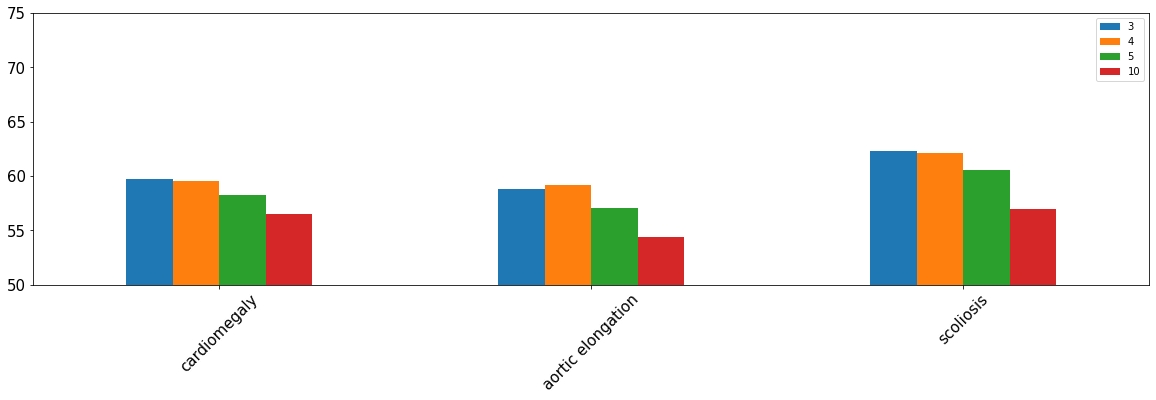

In [54]:
df_acc_mean.plot.bar(figsize=(20, 5), rot=45, fontsize=15, ylim=[50,75])

In [57]:
df_combined = df_acc_mean.applymap(lambda x: f"{x:.2f}") + '+-' + df_acc_stddev.applymap(lambda x: f"{x:.0f}")
df_combined

,3,4,5,10
cardiomegaly,59.67+-34,59.57+-31,58.27+-29,56.48+-23
aortic elongation,58.80+-31,59.13+-27,57.08+-25,54.38+-21
scoliosis,62.31+-34,62.07+-31,60.57+-30,56.99+-27


In [58]:
df_combined = df_combined.applymap(lambda x: x.replace('+-', '$\pm$'))
print(tabulate(df_combined, tablefmt="latex_raw"))

\begin{tabular}{lllll}
\hline
 cardiomegaly      & 59.67$\pm$34 & 59.57$\pm$31 & 58.27$\pm$29 & 56.48$\pm$23 \\
 aortic elongation & 58.80$\pm$31 & 59.13$\pm$27 & 57.08$\pm$25 & 54.38$\pm$21 \\
 scoliosis         & 62.31$\pm$34 & 62.07$\pm$31 & 60.57$\pm$30 & 56.99$\pm$27 \\
\hline
\end{tabular}


# Wass distance

In [22]:
BASE_PATH = ''
model_name = BASE_PATH + 'results_padchest_v33_MOCVAE/models/'

In [23]:
encoder = load_model(model_name + 'e_best_encoder.h5', custom_objects={'sampling': sampling})

/opt/conda/lib/python3.8/site-packages/tensorflow/python/keras/layers/core.py:1043: UserWarning: models.model_MOCVAE is not loaded, but a Lambda layer uses it. It may cause errors.
  warnings.warn('{} is not loaded, but a Lambda layer uses it. '


In [24]:
acc_mean_dict = {}
acc_stddev_dict = {}

for label_base in LABELS:
    if label_base!='normal':
        print("\n-----Label ", label_base, "-----")

        acc_mean_dict[label_base] = []
        acc_stddev_dict[label_base] = []

        for k in [3,4,5,10]:
            if model_name[-14:-8] == 'MOCVAE':
                res_class = get_distance_results_normal(data, encoder, label_base, n_imgs=500, n_neighbors=k, vae=True)
            else:
                res_class = get_distance_results_normal(data, encoder, label_base, n_imgs=500, n_neighbors=k)

            acc_mean, acc_stddev = get_dist_acc(res_class)

            print("Model wasserstein distance k=", k , " neighbors: ", acc_mean, " +-", acc_stddev)

            acc_mean_dict[label_base].append(acc_mean)
            acc_stddev_dict[label_base].append(acc_stddev)

    df_acc_mean = pd.DataFrame.from_dict(acc_mean_dict, orient='index', columns=[3, 4, 5, 10])
    df_acc_stddev = pd.DataFrame.from_dict(acc_stddev_dict, orient='index', columns=[3, 4, 5, 10])


-----Label  cardiomegaly -----
Model wasserstein distance k= 3  neighbors:  0.4395185632731099  +- 0.16248287663983235
Model wasserstein distance k= 4  neighbors:  0.45417442980403117  +- 0.16857886103067576
Model wasserstein distance k= 5  neighbors:  0.46083114590637725  +- 0.16348675665853446
Model wasserstein distance k= 10  neighbors:  0.4841412030578295  +- 0.1659331632409058

-----Label  aortic elongation -----
Model wasserstein distance k= 3  neighbors:  0.4189464231479325  +- 0.1793462375820143
Model wasserstein distance k= 4  neighbors:  0.4231614483836408  +- 0.17577390661852646
Model wasserstein distance k= 5  neighbors:  0.42648490683300777  +- 0.1708592261514678
Model wasserstein distance k= 10  neighbors:  0.45200730594786237  +- 0.1633758693550754

-----Label  scoliosis -----
Model wasserstein distance k= 3  neighbors:  0.46188679463824944  +- 0.15909845580214677
Model wasserstein distance k= 4  neighbors:  0.47004044945823387  +- 0.16196067886517493
Model wasserstein 

<AxesSubplot:>

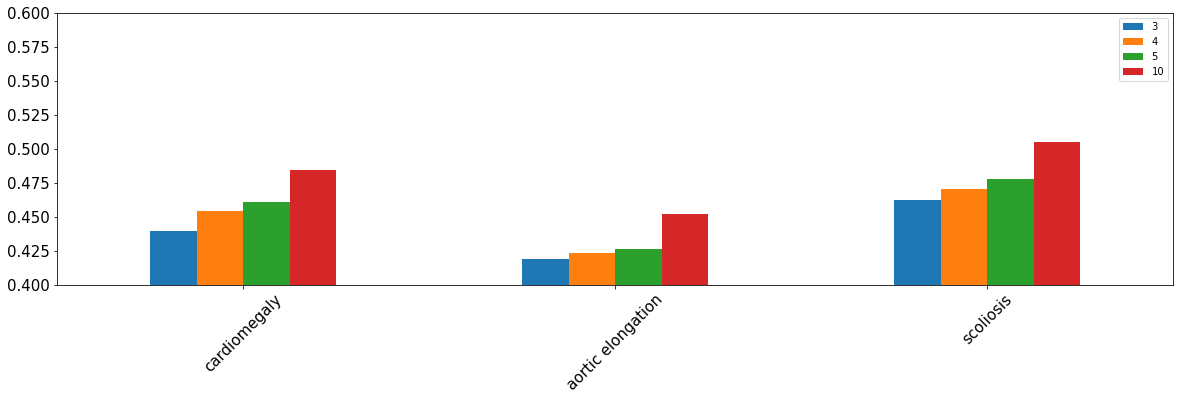

In [29]:
df_acc_mean.plot.bar(figsize=(20, 5), rot=45, fontsize=15, ylim=[0.4,0.6])

In [46]:
df_combined = df_acc_mean.applymap(lambda x: f"{x:.2f}") + '+-' + df_acc_stddev.applymap(lambda x: f"{x:.1f}")
df_combined

,3,4,5,10
cardiomegaly,0.44+-0.2,0.45+-0.2,0.46+-0.2,0.48+-0.2
aortic elongation,0.42+-0.2,0.42+-0.2,0.43+-0.2,0.45+-0.2
scoliosis,0.46+-0.2,0.47+-0.2,0.48+-0.2,0.51+-0.2


In [50]:
df_combined = df_combined.applymap(lambda x: x.replace('+-', '$\pm$'))
print(tabulate(df_combined, tablefmt="latex_raw"))

\begin{tabular}{lllll}
\hline
 cardiomegaly      & 0.44$\pm$0.2 & 0.45$\pm$0.2 & 0.46$\pm$0.2 & 0.48$\pm$0.2 \\
 aortic elongation & 0.42$\pm$0.2 & 0.42$\pm$0.2 & 0.43$\pm$0.2 & 0.45$\pm$0.2 \\
 scoliosis         & 0.46$\pm$0.2 & 0.47$\pm$0.2 & 0.48$\pm$0.2 & 0.51$\pm$0.2 \\
\hline
\end{tabular}
